<a href="https://colab.research.google.com/github/hqcodes/hqprojects/blob/master/Hamoye_stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import scipy.stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


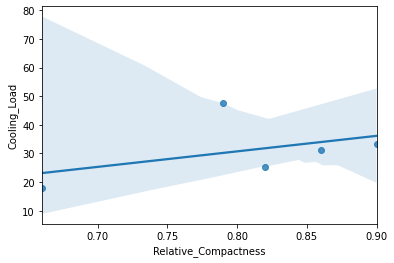

In [ ]:
data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area','X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height','X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
 
data= data.rename(columns=column_names)
 
simple_linear_reg_data= data[['Relative_Compactness','Cooling_Load']].sample(5, random_state=2)
 
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_data)

In [ ]:
#normalizing our data
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
normalized_data= pd.DataFrame(Scaler.fit_transform(data), columns=data.columns)
features_data= normalized_data.drop(columns=['Heating_Load','Cooling_Load'])
target_feature = normalized_data['Heating_Load']
 
#splitting data in testing and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_data, target_feature, test_size=0.3, random_state= 1 )
 
#importing the regression model
from sklearn.linear_model import LinearRegression
 
linear_model = LinearRegression()
#fit training data into the model 
linear_model.fit(x_train, y_train)
#obtain prediction
predicted_values = linear_model.predict(x_test)
print(linear_model.coef_)

from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
 
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

[-6.06412485e-01 -6.38709104e+12  3.72580311e+12  4.79031828e+12
  3.85253906e-01 -2.82287598e-03  2.29593277e-01  1.91354752e-02]


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
 #measure model performance 
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)
 
#r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_values)
round(r2, 3)
print(r2)
 
#RSS
rss=np.sum(np.square(y_test - predicted_values))
round(rss,3)
print(rss)
 
#rmse 
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.8934774890614434
1.823154343547127


0.089

In [ ]:
#rmse 
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [ ]:
features_data.corr()

In [ ]:
def get_weights_data(model, feat, column_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_data = pd.DataFrame(weights).reset_index()
  weights_data.columns = ['Features', column_name]
  weights_data[column_name].round(3)
  return weights_data

linear_model_weights = get_weights_data(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_data(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_data(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.075215,0.000000
1,Relative_Compactness,-6.064125e-01,-0.310372,-0.027719
2,Orientation,-2.822876e-03,0.003366,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.028939,0.021431
4,Glazing_Area,2.295933e-01,0.212870,0.206132
5,Overall_Height,3.852539e-01,0.441370,0.463482
6,Wall_Area,3.725803e+12,0.095452,0.200087
7,Roof_Area,4.790318e+12,-0.174527,-0.000000


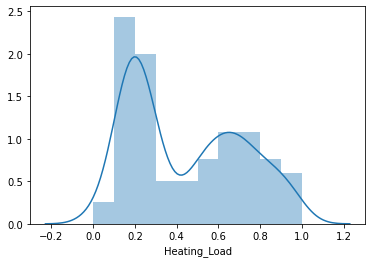

In [ ]:
sns.distplot(target_feature)

In [ ]:
# new rmse with lasso 
lasso_prediction = lasso_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2)
print(rmse)

0.08883942281250232


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.06

In [ ]:
#RSS
rss=np.sum(np.square(y_test - predicted_values))
round(rss,2)
print(rss)

1.823154343547127


In [ ]:
#r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_values)
round(r2, 2)
print(r2)

0.8934774890614434


In [ ]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
